# Day 7

### Topics

1. Bit of a review: Pandas
1. Geo data with `geopandas` & `contextily`
1. Beginning interactivity with `ipywidgets`
1. By their powers combined! Interactive maps



First, import our usual things:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Bit of a review

Recall our use of the Pandas package last time for reading in data & plotting:

In [4]:
gdp = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/spring2020/master/week01/data/GDP.csv")

Looking at our data:

In [5]:
gdp

DATE        GDP
0    1947-01-01    243.164
1    1947-04-01    245.968
2    1947-07-01    249.585
3    1947-10-01    259.745
4    1948-01-01    265.742
..          ...        ...
286  2018-07-01  20749.752
287  2018-10-01  20897.804
288  2019-01-01  21098.827
289  2019-04-01  21340.267
290  2019-07-01  21542.540

[291 rows x 2 columns]

Plotting:

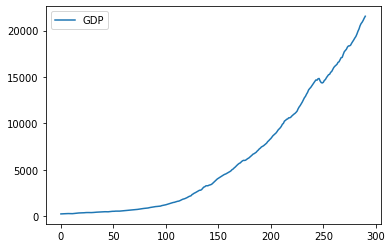

In [7]:
gdp.plot()

Pandas is a useful data analysis & plotting package for tabular data (like CSV data).  We will now use something very similar, `geopandas` to do very similar things but with geometric data.

## Geo data with `geopandas` & `contextily`

First, load the packages:

In [24]:
import geopandas

Let's first look at some data with `geopandas`.  Before loading external data, we can check out some of the "in house" datasets that geopandas comes with:

In [9]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Let's load the New York City Borrows (nybb):

In [10]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))

Let's take a look at this data in a very Pandas-like fashion:

In [11]:
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

So we see that this looks very similar to a Pandas output -- it looks like a table.  One thing that is different is that there is a "geometry" "row" for each Boro entry - this is actually giving coordinates for how to "draw" this particular Borow's outline.  Let's also get some info about our dataset before we plot it.  We can do this with our friend "describe":

In [12]:
gdf.describe()

BoroCode     Shape_Leng    Shape_Area
count  5.000000       5.000000  5.000000e+00
mean   3.000000  558317.333911  1.685981e+09
std    1.581139  249002.452978  9.034868e+08
min    1.000000  330470.010332  6.364715e+08
25%    2.000000  359299.096471  1.186925e+09
50%    3.000000  464392.991824  1.623820e+09
75%    4.000000  741080.523166  1.937479e+09
max    5.000000  896344.047763  3.045213e+09

Some of these, like with a regular Pandas dataframe, are not as useful.  Let's also make a quick plot:

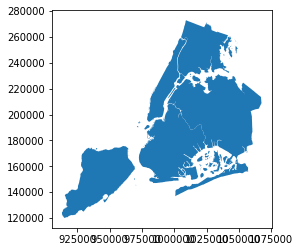

In [13]:
gdf.plot()

Since this is map data, we might expect it to be in lat/long but it is not.  This has to do with the CRS or coordinate-reference-system being used to show this data.  This is sort of like the projection we saw in the lecture.  We can print out what our current CRS is:

In [14]:
gdf.crs

{'init': 'epsg:2263'}

So, this might not be super useful right now, but this is just the designation of one sort of coordinate reference system.  We can transform to a lat/long representation with:

In [21]:
gdf = gdf.to_crs(epsg=4326)

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


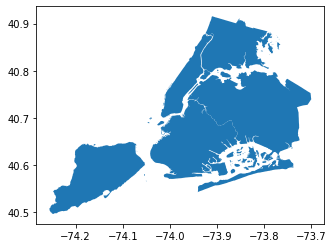

In [22]:
gdf.plot()

So this looks a bit more familiar!

While we won't go into them in detail there are some other interesting functions like `.boundary` chich can be used to plot outlines of the different borows:

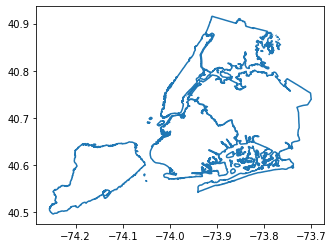

In [23]:
gdf.boundary.plot()

There are others like `.centriod` and `.affline_transformation` that are very geo-data specific.  We'll ignore them for now, but feel free to poke around!  You can do that with:

```python
gdf.
```

and then hitting `TAB` a few times to see the dropdown menu of options.

Let's put this map into context with a larger map of the area using `contextily` and following the [geopandas docs for adding a basemap](https://geopandas.org/gallery/plotting_basemap_background.html).

First we need to import `contextily` to use it:

In [25]:
import contextily as ctx

The default mapping coordinates for `contextily` are [Web Mercator](https://en.wikipedia.org/wiki/Web_Mercator) so we will need to transform our geometric dataset into the Web Mercator projection:

In [26]:
gdf = gdf.to_crs(epsg=3857)

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Let's first plot our NYC data on our own axis:

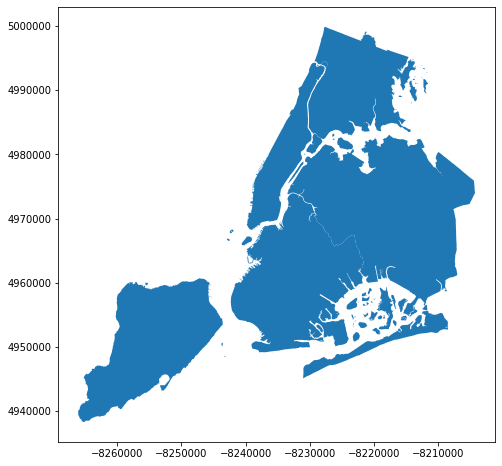

In [27]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax)

plt.show()

So we can see already that the units on the x/y axis are very different!  And even the shapes are a little different than the plots we made above.  Let's re-call this but add a basemap using `contextily`:

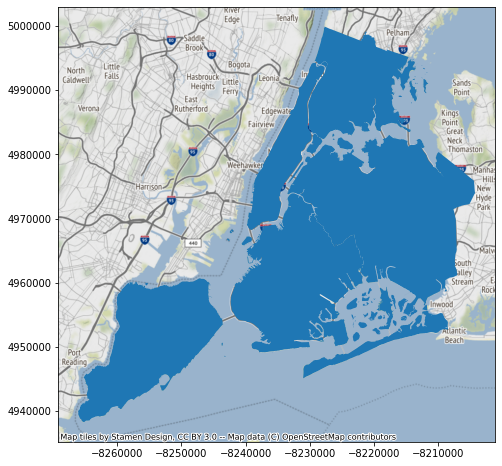

In [30]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax)
ctx.add_basemap(ax=ax)

plt.show()

Hey cool!  We can now see our NYC map on top of a larger map of the NYC area.  Let's make our plot a little see-through so we can see the basemap underneath:

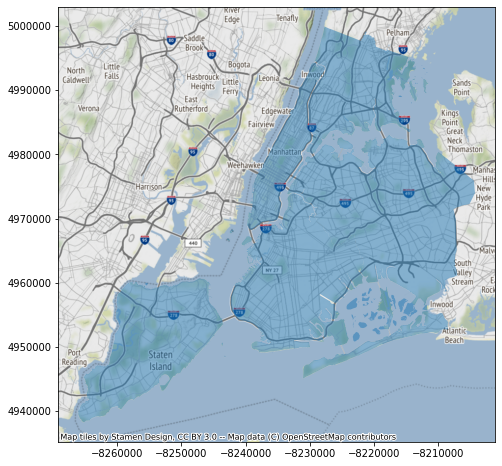

In [31]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax)

plt.show()

Almost there -- let's also add in a black outline for our borows:

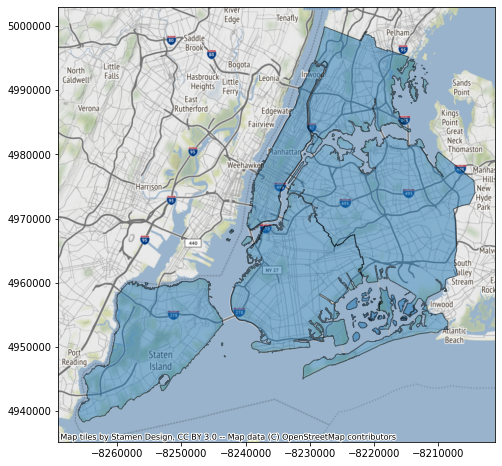

In [32]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

Neat!  Ok, but how can we do this with data that is external to the `geopandas` package?  We can do that by loading by URL like we did before with Pandas!  (We can also download data locally and call it like with Pandas too).


But what data?  Well there is a bunch on the [USDA Geospatial Gateway](https://datagateway.nrcs.usda.gov/), which is a bit hard to navigate but will bring you to the [TIGER/Line Shapefiles download area](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html) which you can use to navigate to their web interface to download data.

But let's stick close to home and use a more user-friendly interface.  Since we can't be together in Cambridge, let's at least use their GIS database!  https://www.cambridgema.gov/Services/gisdatadownloads

This takes you to their GeoJSON portal: http://cambridgegis.github.io/gisdata.html

Which has all kinds of cool data!  Let's try out their [Bridges basemap](https://github.com/cambridgegis/cambridgegis_data/blob/master/Basemap/Bridges/BASEMAP_Bridges.geojson).  When we click on it we are rerouted to their GitHub repository.

If we try to load data from this link, we'll get an error:

In [33]:
bridges = geopandas.read_file('https://github.com/cambridgegis/cambridgegis_data/blob/master/Basemap/Bridges/BASEMAP_Bridges.geojson')

DriverError: '/vsimem/d42516e8801b4574897395ed1a94b63f' not recognized as a supported file format.

This is because we need to access the "raw" version of this dataset.  To do that we need to look for a button on the GitHub repo that says either "RAW" or "Download".  In this case we have a raw button which takes us to: https://raw.githubusercontent.com/cambridgegis/cambridgegis_data/master/Basemap/Bridges/BASEMAP_Bridges.geojson

This is what we want to load:

In [35]:
bridges = geopandas.read_file('https://raw.githubusercontent.com/cambridgegis/cambridgegis_data/master/Basemap/Bridges/BASEMAP_Bridges.geojson')

In [37]:
bridges.head()

TYPE                                           geometry
0     RIVER BRIDGE  POLYGON ((-71.11108 42.35218, -71.11078 42.352...
1     RIVER BRIDGE  POLYGON ((-71.11075 42.35259, -71.11069 42.353...
2  RAILROAD BRIDGE  POLYGON ((-71.10877 42.35368, -71.10877 42.353...
3      ROAD BRIDGE  POLYGON ((-71.10992 42.35374, -71.10991 42.353...
4     RIVER BRIDGE  POLYGON ((-71.09085 42.35333, -71.09098 42.353...

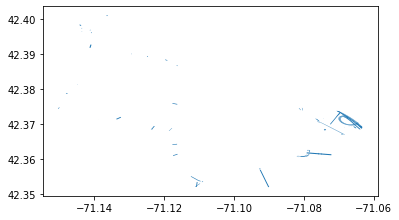

In [38]:
bridges.plot()

Let's play the same game with a base map we did before (recalling we need to go into Web Mercator projection):

In [39]:
bridges = bridges.to_crs(epsg=3857)

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Plot!

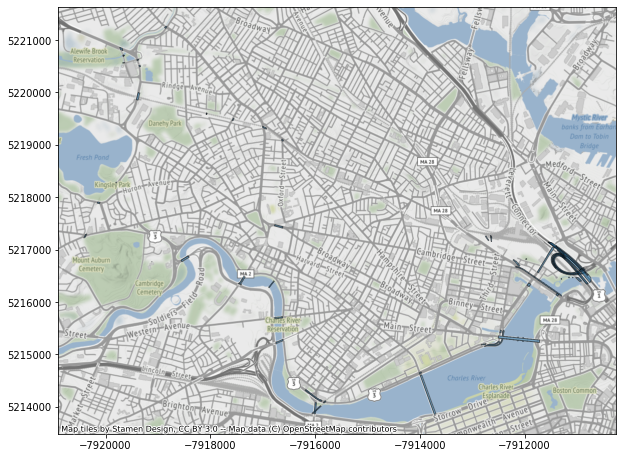

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

bridges.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

In this case, its a little faint so let's do full opacity and use a bright color like read to highlight:

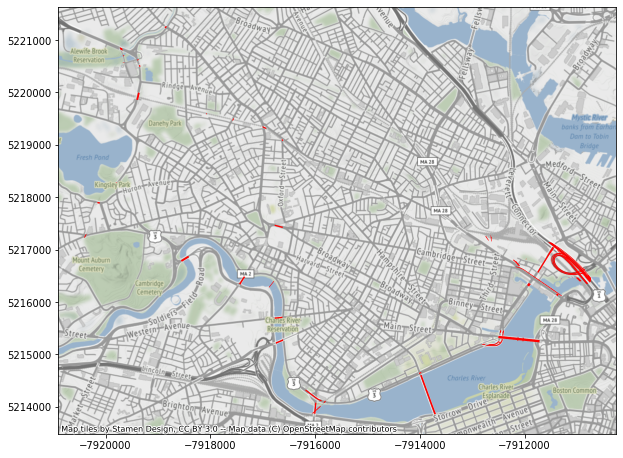

In [43]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

bridges.plot(ax=ax, color='red')
ctx.add_basemap(ax=ax)

plt.show()

Much better!

## Beginning interactivity with `ipywidgets`

Now, to change gears for a moment, another thing we want to do is make these plots interactive in some way.  To do that we'll need a library called `ipywidgets`:

In [44]:
import ipywidgets

There are a few ways we can use this library in a few ways, the first way is through something called a "decorator" that will decorate a function.  The syntax will look a little like:

```python
@decorator
def my_function():
    # stuff
...
```

This decorator is "decorating" the function like you'd put a hat to decorate your head -- it sits on top of the function and interacts only with this function.  Let's try a simple one to start -- print out a phrase from a list.

Let's sketch out what we want to do with code statically and build from there.  First, let's make something that prints a phrase:

In [45]:
print('Hi there!')

Hi there!


Now, let's make the actual phrase an input:

In [46]:
phrase = 'I am phrase.'

print(phrase)

I am phrase.


Now, let's make this into a function:

In [47]:
def my_phrase_print(phrase):
    print(phrase)

Let's use it a few times:

In [48]:
my_phrase_print('hi!')

hi!


In [50]:
my_phrase_print('hi hi!')
my_phrase_print('helooooooo!!')

hi hi!
helooooooo!!


Now let's decorate this function with the decorator `@ipywidgets.interact`:

In [51]:
@ipywidgets.interact(phrase='')
def my_phrase_print(phrase):
    print(phrase)

interactive(children=(Text(value='', description='phrase'), Output()), _dom_classes=('widget-interact',))

Whoa!  What did we just do!  We told `ipywidgets` that our phrase was going to be text input which it figured out by the default value we put in its definition AND that the input parameter `phrase` was going to be the one we wanted to change.  Let's try another.  Also note that when we ran this cell it called the function where before we would have to call the function after we declared it.


Let's say we want to only let our user put in a selected set of phrases from a list:

In [53]:
phrases_list = ['hi there!', 'I am phrase.', 'decorators decorate!']

We could do the same thing again but with this list:

In [54]:
@ipywidgets.interact(phrase=phrases_list)
def my_phrase_print(phrase):
    print(phrase)

interactive(children=(Dropdown(description='phrase', options=('hi there!', 'I am phrase.', 'decorators decorat…

Now we have a dropdown menu instead!  There are ways to choose what kinds of widgets we get (integer sliders, dropdown menus, text boxes), but here we are having `ipywidgets` basically figure it out for us on its own.

## By their powers combined! Interactive maps

Let's put these two ideas together to make some interactive maps!

Let me first start with my original plot:

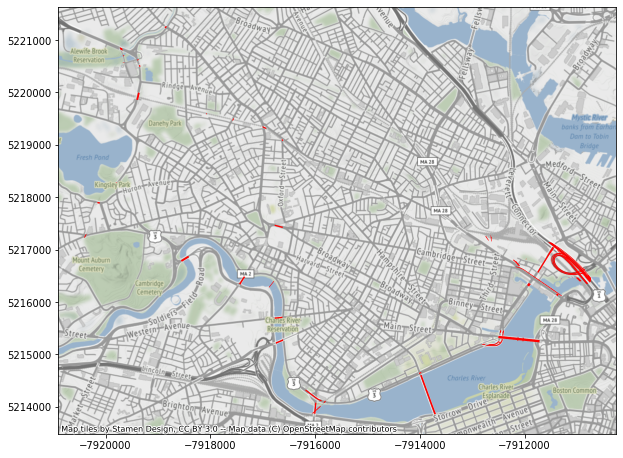

In [56]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

bridges.plot(ax=ax, color='red')
ctx.add_basemap(ax=ax)

One thing that I found I wanted to change was the color, so I'm going to make this into an interactive thing.  Going step by step like we did before, I'm first going to make this "static" but with a parameter for color:

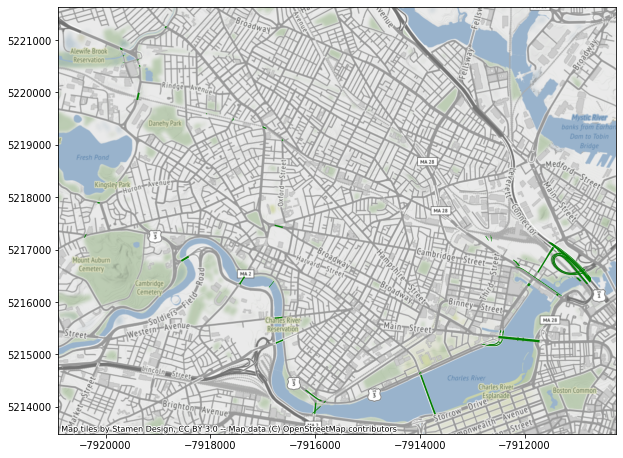

In [58]:
color = 'green'

fig, ax = plt.subplots(1,1,figsize=(10,8))

bridges.plot(ax=ax, color=color)
ctx.add_basemap(ax=ax)

Now, in the next step, I'm going to make this into a function:

In [59]:
def my_map(color):
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    bridges.plot(ax=ax, color=color)
    ctx.add_basemap(ax=ax)

And give it a try:

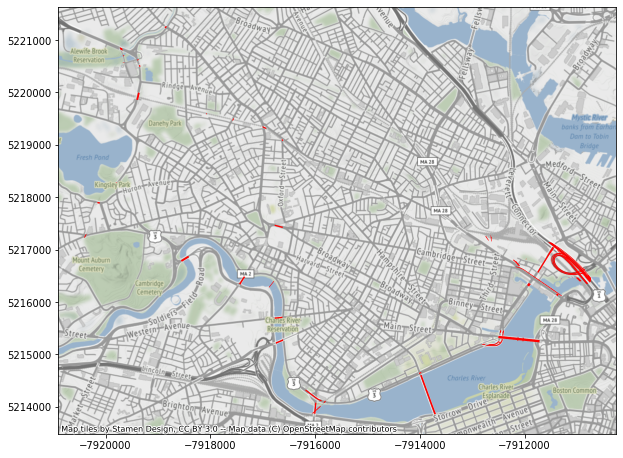

In [60]:
my_map('red')

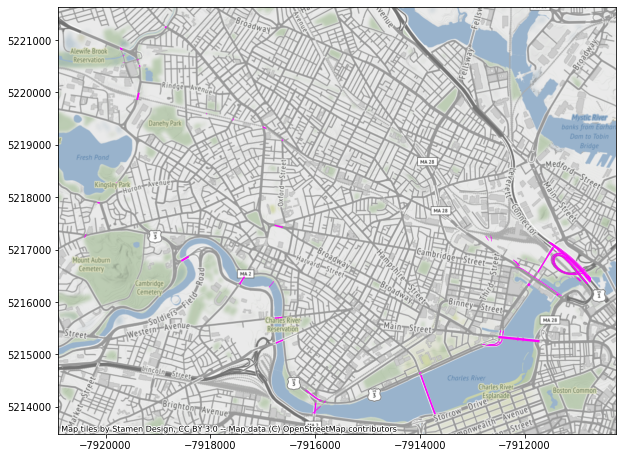

In [61]:
my_map('magenta')

Finally, I'm going to "decorate" my function with `@ipywidgets.interact`.  I think I'll give a list of colors since that seems to make the most sense of what I'd think my user would want to mess around with:

In [62]:
@ipywidgets.interact(color=['red', 'blue', 'magenta', 'yellow', 'black', 'maroon', 'lightgray'])
def my_map(color):
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    bridges.plot(ax=ax, color=color)
    ctx.add_basemap(ax=ax)

interactive(children=(Dropdown(description='color', options=('red', 'blue', 'magenta', 'yellow', 'black', 'mar…

TahDah!  We did it!  

### Take Away

Let's summarize the steps we went through to get to our interactive plot:
1. Read in the data using `geopandas`
1. Explored our data and made some quick plots
1. Figured out what parameter we wanted to change and then made a "static" image with this parameter
1. Made this into a function
1. Finally, we added the `@ipywidgets.interact` decorator

These will be good steps to follow going forward.

FYI, we can also do multi-parameter interactions:

In [63]:
@ipywidgets.interact(color=['red', 'blue', 'magenta', 'yellow', 'black', 'maroon', 'lightgray'], 
                    alpha=0.5)
def my_map(color, alpha):
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    bridges.plot(ax=ax, color=color, alpha=alpha)
    ctx.add_basemap(ax=ax)

interactive(children=(Dropdown(description='color', options=('red', 'blue', 'magenta', 'yellow', 'black', 'mar…

Of course we probably don't want to use any values of `alpha` outside 0-1, which we can [also tell ipywidgets about](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) by explicitly using a widget type as an input:

In [65]:
@ipywidgets.interact(color=['red', 'blue', 'magenta', 'yellow', 'black', 'maroon', 'lightgray'], 
                    alpha=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5))
def my_map(color, alpha):
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    bridges.plot(ax=ax, color=color, alpha=alpha)
    ctx.add_basemap(ax=ax)

interactive(children=(Dropdown(description='color', options=('red', 'blue', 'magenta', 'yellow', 'black', 'mar…